# Modèle intelligent pour la détection des masques

In [1]:
# Si travail sur Colabs
#from google.colab import drive
#drive.mount('/content/gdrive')

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras

# pour masquer les messages "d'erreur"
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Si travail sur Colabs
filepath = './model_mask.h5'
loaded_model = keras.models.load_model(filepath)

## Partie 3 : Application

- **Test du modèle développé sur des nouvelles images, en affichant un message : Avec masque ou Non masque sur l’image**

In [3]:
liste_label = ['sans masque', 'avec masque']
def dechiffrer(path):
    image = cv2.imread(path)
    imgr = cv2.resize(image,(224,224), interpolation = cv2.INTER_AREA)
    img_exp = np.expand_dims(np.array(imgr)/255.0, axis=0)

    prediction = loaded_model.predict(img_exp)
    resultat = liste_label[np.argmax(prediction)]

    image_pred = cv2.putText(image, resultat, (120, 70), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 3, (255,0,0))

    plt.figure(figsize=(8,8))
    plt.subplot()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image_pred)
    plt.show()

    #print('Prédiction :',resultat)
    return(resultat)

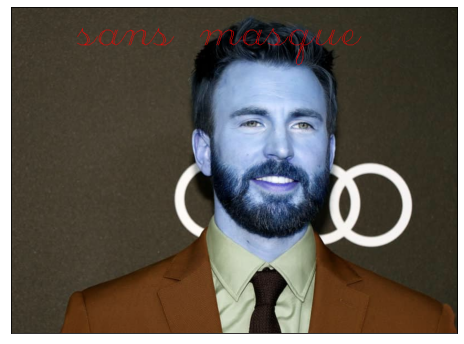

'sans masque'

In [4]:
# Lire 1 image : 
path = './images2/image13.jpg'
dechiffrer(path)

- **Prédiction sur plusieurs photos :** 

In [5]:
# Lire les image d'un dossier :
import os

path = './images2'
liste_label = ['sans masque', 'avec masque']

images = []
predictions = []

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path,filename))
    imgr = cv2.resize(img,(224,224), interpolation = cv2.INTER_AREA)
    images.append(imgr)
    
    img_exp = np.expand_dims(np.array(imgr)/255.0, axis=0)

    prediction = loaded_model.predict(img_exp)
    predictions.append(liste_label[np.argmax(prediction)])


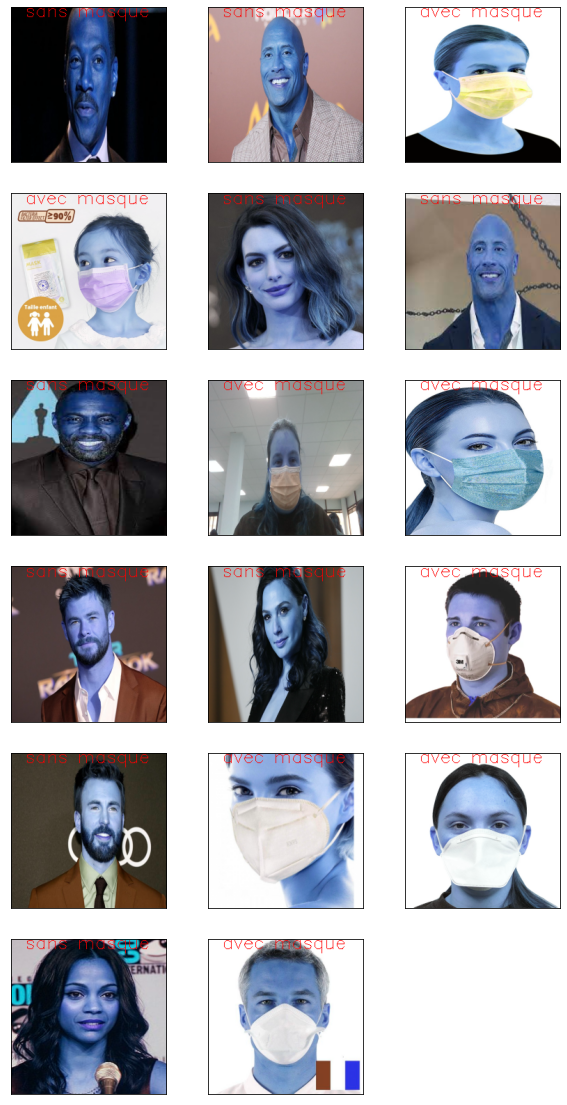

In [6]:
# pour masquer les messages "d'erreur"
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
for i in range(17):
    img = images[i]
    predict = predictions[i]
    plt.subplot(6,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = cv2.putText(img, predict, (20, 15), 
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.85, (255,0,0))
    plt.imshow(image)
    
#plt.show()

- **Code python qui active la Webcam et identifie si la personne porte un masque en affichant le message sur l’image**

In [7]:
# import bibliothèque opencv 
import cv2
liste_label = ['sans masque', 'avec masque']
  
# definie un objet de capture vidéo
vid = cv2.VideoCapture(0)

# Condition/boucle while que tant que la viéo capture
while(True):
    # Capturer l'image vidéo
    # par cadre
    ret, frame = vid.read()
    
    imgr = cv2.resize(frame,(224,224), interpolation = cv2.INTER_AREA)
    img_exp = np.expand_dims(np.array(imgr)/255.0, axis=0)

    prediction = loaded_model.predict(img_exp)
    resultat = liste_label[np.argmax(prediction)]

    image_pred = cv2.putText(frame, resultat, (120, 70), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 2, (255,0,0))
  
    # Affiche le résultat
    cv2.imshow('frame', image_pred)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

![Application de détection](Capture_essais_1.jpg)